## Análisis de Datos Meteorológicos con una API Pública
Obtener datos del clima de una ciudad usando la API de Open-Meteo (https://open-meteo.com/) y analizar la temperatura.

* Haz una petición a la API para que devuelva el pronóstico de las temperaturas para una semana en Bilbao. El parámetro correspondiente es `temperature_2m` además de la latitud y la longitud.
* Procesa la respuesta en formato JSON para obtener dos listas: una con la lista de temperaturas y otra con las fechas-horas correspondientes.
* Crea un DataFrame con esas dos columnas: `Hora` y `Temperatura`
* Elige la gráfica adecuada y visualiza el pronóstico de temperaturas.

Para crear la variable `Hora` del DataFrame puedes introducir directamente la lista que se obtiene del campo `data["hourly"]["time"]` o procesar esa lista mediante el siguiente código:

`hours = pd.date_range(start=lista_de_horas, periods=len(temps), freq="H")`

In [1]:
import requests
import pandas as pd

# Coordenadas de Bilbao
latitude = 43.26271
longitude = -2.92528


url = f"https://api.open-meteo.com/v1/forecast?"  # Aquí vienen el resto de los parámetros

params = {
	"latitude": latitude,
	"longitude": longitude,
	"hourly": "temperature_2m"
}

responses = requests.get(url, params=params).json()




In [2]:
print(responses)

{'latitude': 43.26, 'longitude': -2.9300003, 'generationtime_ms': 0.05888938903808594, 'utc_offset_seconds': 0, 'timezone': 'GMT', 'timezone_abbreviation': 'GMT', 'elevation': 21.0, 'hourly_units': {'time': 'iso8601', 'temperature_2m': '°C'}, 'hourly': {'time': ['2025-03-27T00:00', '2025-03-27T01:00', '2025-03-27T02:00', '2025-03-27T03:00', '2025-03-27T04:00', '2025-03-27T05:00', '2025-03-27T06:00', '2025-03-27T07:00', '2025-03-27T08:00', '2025-03-27T09:00', '2025-03-27T10:00', '2025-03-27T11:00', '2025-03-27T12:00', '2025-03-27T13:00', '2025-03-27T14:00', '2025-03-27T15:00', '2025-03-27T16:00', '2025-03-27T17:00', '2025-03-27T18:00', '2025-03-27T19:00', '2025-03-27T20:00', '2025-03-27T21:00', '2025-03-27T22:00', '2025-03-27T23:00', '2025-03-28T00:00', '2025-03-28T01:00', '2025-03-28T02:00', '2025-03-28T03:00', '2025-03-28T04:00', '2025-03-28T05:00', '2025-03-28T06:00', '2025-03-28T07:00', '2025-03-28T08:00', '2025-03-28T09:00', '2025-03-28T10:00', '2025-03-28T11:00', '2025-03-28T12:00

In [3]:
df = pd.DataFrame({"Hora": responses["hourly"]["time"], "Temperatura" : responses["hourly"]["temperature_2m"]})

df

,Hora,Temperatura
0,2025-03-27T00:00,10.7
1,2025-03-27T01:00,10.8
2,2025-03-27T02:00,11.0
3,2025-03-27T03:00,10.6
4,2025-03-27T04:00,10.8
...,...,...
163,2025-04-02T19:00,16.5
164,2025-04-02T20:00,13.8
165,2025-04-02T21:00,11.8
166,2025-04-02T22:00,11.0


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

([], [])

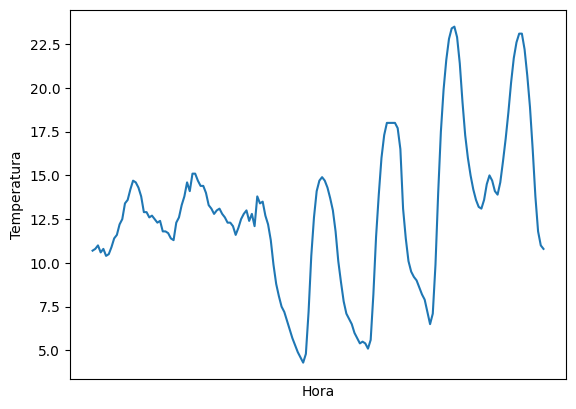

In [5]:
sns.lineplot(data=df, x="Hora", y="Temperatura")
plt.xticks([])